In [75]:
import librosa
import numpy as np
import pandas as pd
import os

In [76]:
PATH_TO_RAVDESS = 'Datasets/Audio_Speech_Actors_01-24/'

**MFCCs** - Mel-Frequency Cepstral Coefficients
https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

**Example of file name and encoding it: 02-01-06-01-02-01-12.mp4**

From left to right:
* 02 - Modality (01 - Full AV, 02 - Video only, 03 - Audio only)
* 01 - Vocal channel (01 - Speech, 02 - Song)
* 06 - Emotion (01 - Neutral, 02 - Calm, 03 - Happy, 04 - Sad, 05 - Angry, 06 - Fearful, 07 - Disgust, 08 - Suprised)
* 01 - Emotional Intensity (01 - Normal, 02 - Strong) NOTE: There is no strong intensity for the 'neutral' emotion.
* 02 - Statement (01 - "Kids are talking by the door", 02 - "Dogs are sitting by the door")
* 01 - Repetition (01 - 1st repetition, 02 - 2nd repetition)
* 12 - Actor (01 to 24, Odd actors are male, even are female)

In [77]:
emotion_encode = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

In [78]:
# Extracting MFCCS

def extract_mfccs(file_path):
    audio, sample_rate = librosa.load(file_path, sr=None)
    mfcss = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfcss = np.mean(mfcss.T, axis=0)
    return mfcss

In [79]:
# Load data

def load_ravdess(path=PATH_TO_RAVDESS):
    features = []
    labels = []

    for actor in os.listdir(path):
        actor_path = os.path.join(path, actor)
        if not os.path.isdir(actor_path):
            continue

        for file in os.listdir(actor_path):
            if not file.endswith('.wav'):
                continue
            
            file_path = os.path.join(actor_path, file)
            mfccs = extract_mfccs(file_path)
            
            # Extracting emotion from the filename
            parts = file.split('-')
            emotion_code = parts[2]
            emotion = emotion_encode[emotion_code]
            
            features.append(mfccs)
            labels.append(emotion)

    df = pd.DataFrame(features)
    df['emotion'] = labels
    return df

In [80]:
df = load_ravdess()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-751.356445,74.124039,17.598696,32.941101,9.036399,24.251823,4.012048,10.606648,4.446539,3.998725,...,0.493218,-1.781921,0.366142,-0.944250,-0.411532,-0.362625,0.337468,0.459020,-0.061222,calm
1,-628.402222,71.628784,18.125771,22.606133,0.687678,7.724906,-4.560065,8.276053,-2.570548,2.013315,...,-0.329190,-3.186623,-1.137531,-1.502676,-1.646821,-1.200496,-0.694648,-1.070100,-0.747693,disgust
2,-691.527588,67.641579,11.938578,16.438150,4.749771,13.948555,1.126517,5.302118,-1.974818,-0.539712,...,0.311477,-1.000259,1.702897,-0.957920,-0.732991,0.512927,-0.715284,-0.535482,-0.154579,happy
3,-682.217651,72.501259,10.495389,24.943312,2.750269,15.018012,0.910928,9.396455,1.274045,3.206319,...,-0.599410,-2.882061,0.155028,-0.331115,-2.472364,-1.121620,0.043523,-0.958235,0.652552,fearful
4,-534.587341,57.255592,3.957171,13.832829,-2.346812,5.326596,-3.008405,-0.120483,-3.161658,-1.930261,...,-0.839828,-3.237251,-2.482903,-2.223131,-1.780890,-1.917953,-1.180512,0.671436,0.880393,happy


In [81]:
print(len(df))
print(df['emotion'].unique())

1440
['calm' 'disgust' 'happy' 'fearful' 'angry' 'surprised' 'neutral' 'sad']


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        1440 non-null   float32
 1   1        1440 non-null   float32
 2   2        1440 non-null   float32
 3   3        1440 non-null   float32
 4   4        1440 non-null   float32
 5   5        1440 non-null   float32
 6   6        1440 non-null   float32
 7   7        1440 non-null   float32
 8   8        1440 non-null   float32
 9   9        1440 non-null   float32
 10  10       1440 non-null   float32
 11  11       1440 non-null   float32
 12  12       1440 non-null   float32
 13  13       1440 non-null   float32
 14  14       1440 non-null   float32
 15  15       1440 non-null   float32
 16  16       1440 non-null   float32
 17  17       1440 non-null   float32
 18  18       1440 non-null   float32
 19  19       1440 non-null   float32
 20  20       1440 non-null   float32
 21  21       1440 

In [83]:
df.describe()


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,...,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,-617.135437,66.092415,-4.855443,10.203427,-0.221090,8.248786,-8.382126,0.882888,-7.187926,-5.599998,...,-0.330239,0.339676,-0.262191,0.649060,0.544409,0.491417,0.565686,0.690941,0.414486,0.892093
std,102.579620,14.824665,11.792966,8.137515,6.869429,7.182301,6.067137,5.215737,4.970867,4.349589,...,2.228255,2.332130,2.191540,2.087871,2.017764,1.992085,1.937063,1.898177,1.963126,2.001940
min,-873.242310,18.962200,-51.957912,-17.508692,-22.980276,-11.918347,-29.964558,-16.975168,-21.486061,-21.439531,...,-5.994778,-4.969791,-5.206000,-4.321074,-4.948631,-6.151189,-5.380692,-4.377184,-4.573128,-4.713404
25%,-693.664764,55.786286,-12.181195,4.912715,-4.880035,2.871039,-12.373206,-2.674862,-10.828943,-8.717092,...,-1.764310,-1.178640,-1.691144,-0.767527,-0.803697,-0.804872,-0.782235,-0.581812,-0.959422,-0.492579
50%,-622.848907,66.310314,-4.090637,10.303168,-0.376970,8.562731,-8.939194,0.726703,-7.731442,-5.620663,...,-0.563979,0.028876,-0.466366,0.398458,0.257466,0.231559,0.377934,0.542146,0.147483,0.643873
75%,-551.604279,76.615633,3.577858,15.061989,4.965186,13.645657,-4.223574,4.265066,-3.371513,-2.330798,...,0.771342,1.524129,0.944311,1.777658,1.679974,1.735712,1.655111,1.791216,1.585997,2.041236
max,-333.377960,115.125786,22.603916,36.563427,21.130016,27.950075,10.092591,16.410278,6.087853,7.422122,...,12.655916,14.277499,10.516112,11.420576,9.299726,8.715325,10.268682,9.382309,9.480828,10.302836


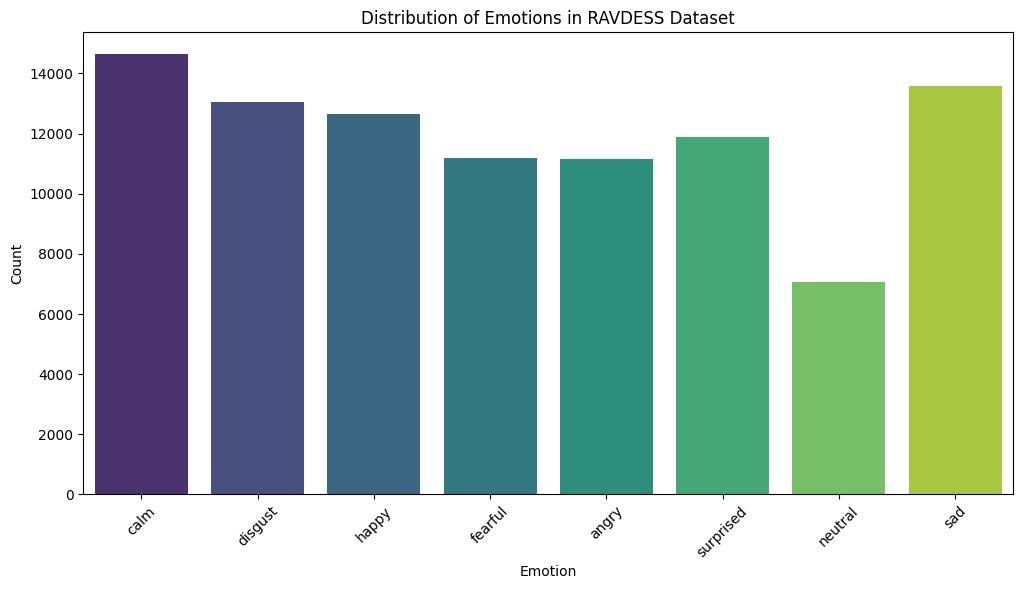

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of emotions

plt.figure(figsize=(12, 6))
sns.countplot(x='emotion', hue='emotion', data=df, palette='viridis', legend=False)
plt.title('Distribution of Emotions in RAVDESS Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [85]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.utils import to_categorical

# Encoding the labels
le = LabelEncoder()
emotion_encoded = le.fit_transform(df['emotion'])

emotion_onehot = to_categorical(emotion_encoded)

emotion_onehot

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(1440, 8))

In [86]:
from sklearn.model_selection import train_test_split

X = df.drop('emotion', axis=1).values
y = emotion_onehot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1152, 40), (288, 40), (1152, 8), (288, 8))

In [87]:
# Standardize data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

num_classes = y.shape[1]

model1 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1], )),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/home/nobodybob/programiranje/python/Machine Learning/Speech Emotion Recognition/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-21 20:15:55.762069: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [89]:
model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1481 - loss: 2.1212 - val_accuracy: 0.2326 - val_loss: 1.9402
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2468 - loss: 1.9589 - val_accuracy: 0.2951 - val_loss: 1.8389
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2639 - loss: 1.8477 - val_accuracy: 0.3403 - val_loss: 1.7461
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3284 - loss: 1.7191 - val_accuracy: 0.3854 - val_loss: 1.6536
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3756 - loss: 1.6055 - val_accuracy: 0.4306 - val_loss: 1.5564
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4458 - loss: 1.5441 - val_accuracy: 0.4375 - val_loss: 1.4851
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4564 - loss: 1.4491 - val_accuracy: 0.4688 - val_loss: 1.4147
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4542 - loss: 1.4011 - val_accuracy: 0.4826 - val_loss

In [93]:
loss, acc = model1.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.5f}, Test Accuracy: {acc*100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6928 - loss: 0.9366 
Test Loss: 0.91241, Test Accuracy: 72.57%
